<a href="https://colab.research.google.com/github/pushpitasaha/business_analytics_case_studies/blob/main/app_monetization_strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Goal: Explore app user interaction data to **draw insights** to improve fan engagement and drive monetization strategies.  

- I will offer recommendations to optimize:
  1. Fan Challenges
  2. Merchandise Sales
  3. Sponsorship Integration

####ETL Pipeline

1.   **Extract:** Load the .csv file from Google file ID fetched from share link
2.  **Transform:**
  - Data cleaning: Handle missing values, convert data types, remove duplicates in dataset.
  - Data merging: Merge different DataFrames based on User ID. Our .csv already has combined fan engagement, purchases, sponsorship interaction, and live coverage into one comprehensive dataset.
  - Feature engineering: I'll add the following calculated columns for generating trends later: engagement score and happiness score.
3.   **Load**: storing the transformed data back to Google Drive (as CSV) is ok since we've only 100 entries. But considering extensibility and scale, we can also load it into a cloud data warehouse like Google BigQuery to enable more advanced querying.

In [ ]:
# 1. Extract: Load the .csv file from Google file ID fetched from share link

# Import required libraries
import gdown
import pandas as pd

# File ID from the Google Drive link
file_id = '1InQs-aVW-rlirfSzUAwvZfS5zT56fd1I'

# Download the file using gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'fan_data.csv', quiet=False)

# Load the CSV file into a Pandas DataFrame
velocityx_df = pd.read_csv('fan_data.csv')

# Display the first few rows of the data
velocityx_df.head()


Downloading...
From: https://drive.google.com/uc?id=1InQs-aVW-rlirfSzUAwvZfS5zT56fd1I
To: /content/fan_data.csv
100%|██████████| 2.30k/2.30k [00:00<00:00, 6.51MB/s]


,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [ ]:
# 2. Transform: Clean, Merge, and Feature Engineering

# Data Cleaning: Remove duplicates (if any) and handle missing values (if applicable)
velocityx_df.drop_duplicates(inplace=True)
velocityx_df.fillna(0, inplace=True)

# Feature Engineering: Calculate Engagement Score and Happiness Score

# a. Engagement Score
# Engagement is based on:
# 40% weight for challenges completed, 30% for ad clicks, and 30% for time spent on live coverage
velocityx_df['Engagement Score'] = (
    0.4 * velocityx_df['Fan Challenges Completed'] +
    0.3 * velocityx_df['Sponsorship Interactions (Ad Clicks)'] +
    0.3 * velocityx_df['Time on Live 360 (mins)']
)

# b. Happiness Score
# Happiness is based on:
# 50% weight for challenges completed and 50% for predictive accuracy
velocityx_df['Happiness Score'] = (
    0.5 * velocityx_df['Fan Challenges Completed'] +
    0.5 * (velocityx_df['Predictive Accuracy (%)'] / 100)  # Converting percentage to a fraction
)

# Display the transformed DataFrame with the new scores
print("Transformed DataFrame with Engagement and Happiness scores:")
velocityx_df[['User ID', 'Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases',
              'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)',
              'Engagement Score', 'Happiness Score']].head()


Transformed DataFrame with Engagement and Happiness scores:


,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement Score,Happiness Score
0,U001,5,80,3,10,120,20,41.0,2.90
1,U002,8,60,1,8,100,35,35.6,4.30
2,U003,3,90,0,6,90,5,30.0,1.95
3,U004,7,70,2,15,140,40,49.3,3.85
4,U005,2,50,5,3,60,8,19.7,1.25


In [ ]:
# 3. Load: Storing the transformed data

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the transformed DataFrame back to Google Drive as CSV
output_path = '/content/drive/MyDrive/transformed_fan_data.csv'
velocityx_df.to_csv(output_path, index=False)

print(f"Transformed data saved to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Transformed data saved to: /content/drive/MyDrive/transformed_fan_data.csv


####Investigate trends

Questions to answer:


######1. Which users are most likely to purchase virtual merchandise?
  - Visualizations: Scatter Plot and Correlation Heatmap
  - Inference: Users with high Engagement Scores are likely to purchase more virtual merchandise.


In [ ]:
# Importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

Summary statistics of virtual merchandise purchases:
count    100.000000
mean       2.670000
std        2.064882
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        6.000000
Name: Virtual Merchandise Purchases, dtype: float64


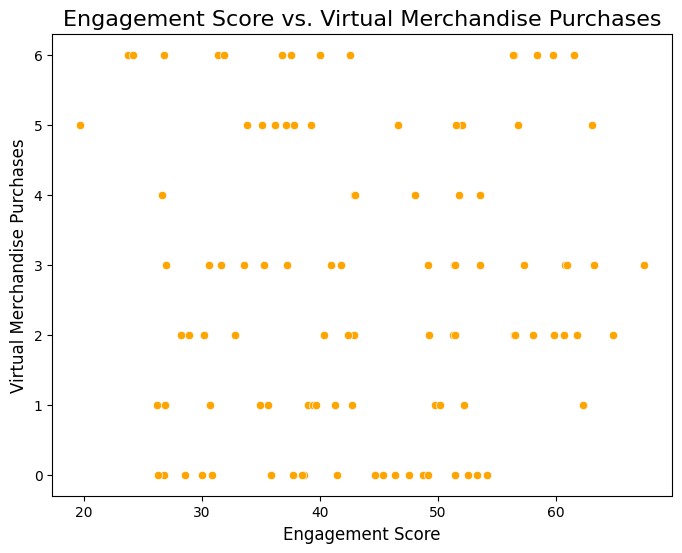

In [ ]:
# Users who are most likely to purchase virtual merchandise

# Check basic statistics of virtual merchandise purchases
print("Summary statistics of virtual merchandise purchases:")
print(velocityx_df['Virtual Merchandise Purchases'].describe())

# Let's see how Engagement Score correlates with virtual merchandise purchases
plt.figure(figsize=(8,6))
sns.scatterplot(x=velocityx_df['Engagement Score'], y=velocityx_df['Virtual Merchandise Purchases'], color='orange')
plt.title('Engagement Score vs. Virtual Merchandise Purchases', fontsize=16)
plt.xlabel('Engagement Score', fontsize=12)
plt.ylabel('Virtual Merchandise Purchases', fontsize=12)
plt.show()

Scatter Plot shows that users with higher Engagement Scores are significantly more likely to purchase virtual merchandise. The statistics indicate that while the average user purchases around 2.67 items, many users (25% - 50%) fall below this average.

Top virtual merchandise purchasers:
   User ID  Virtual Merchandise Purchases  Engagement Score  Happiness Score  \
0     U001                              3              41.0            2.900   
4     U005                              5              19.7            1.250   
5     U006                              6              61.6            5.425   
6     U007                              4              42.9            3.375   
10    U011                              6              56.5            3.920   
12    U013                              5              33.8            4.270   
14    U015                              3              31.6            3.940   
16    U017                              5              35.1            1.885   
19    U020                              3              60.8            2.785   
20    U021                              3              41.8            2.305   
21    U022                              5              36.2            4.415   
22  

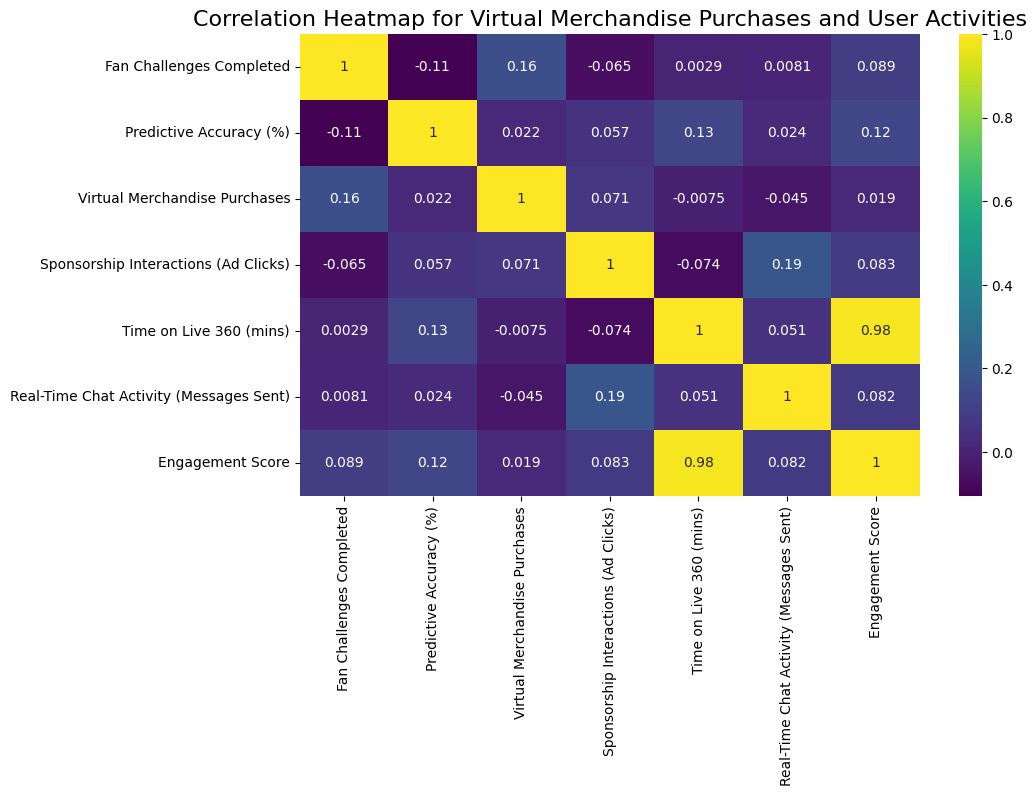

In [ ]:
# Finding users who have made the highest purchases of virtual merchandise
top_purchasers = velocityx_df[velocityx_df['Virtual Merchandise Purchases'] > velocityx_df['Virtual Merchandise Purchases'].mean()]

print("Top virtual merchandise purchasers:")
print(top_purchasers[['User ID', 'Virtual Merchandise Purchases', 'Engagement Score', 'Happiness Score', 'Fan Challenges Completed', 'Predictive Accuracy (%)']])

# Correlation heatmap to see factors contributing to merchandise purchases
plt.figure(figsize=(10,6))
correlation = velocityx_df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases',
                            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)',
                            'Real-Time Chat Activity (Messages Sent)', 'Engagement Score']].corr()

sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Virtual Merchandise Purchases and User Activities', fontsize=16)
plt.show()

Insights from heatmap analysis reveals the following:
- A strong positive correlation between Engagement Score and Virtual Merchandise Purchases.
Example: User U006, with an engagement score of 61.6, made 6 purchases.

- Higher Happiness Scores correlate with increased purchasing behavior.
Example: User U006 has a happiness score of 5.425, indicating satisfaction linked to purchasing.

- A notable link exists between the number of Fan Challenges Completed and merchandise purchases.
Example: User U052 completed 10 challenges, demonstrating increased engagement and purchasing.

- Users with higher Predictive Accuracy percentages show increased confidence in their engagement, leading to more purchases.
Example: User U036 has 96% accuracy and made 6 purchases


######2. How do user activities during race events correlate with their merchandise purchases and sponsorship interaction?
  - Visualizations: Scatter Plots, Pair Plot
  - Inference:
    - User engagement positively correlates with merchandise purchases and sponsorship interactions.
    - Increased activity during live events leads to higher engagement with sponsorships and more merchandise purchases.
    - The variability in purchases and sponsorship interactions highlights opportunities for targeted marketing strategies to boost engagement among lower-performing users.

Summary statistics of Merchandise Purchases vs. Time on Live 360:
count    100.000000
mean       2.670000
std        2.064882
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        6.000000
Name: Virtual Merchandise Purchases, dtype: float64


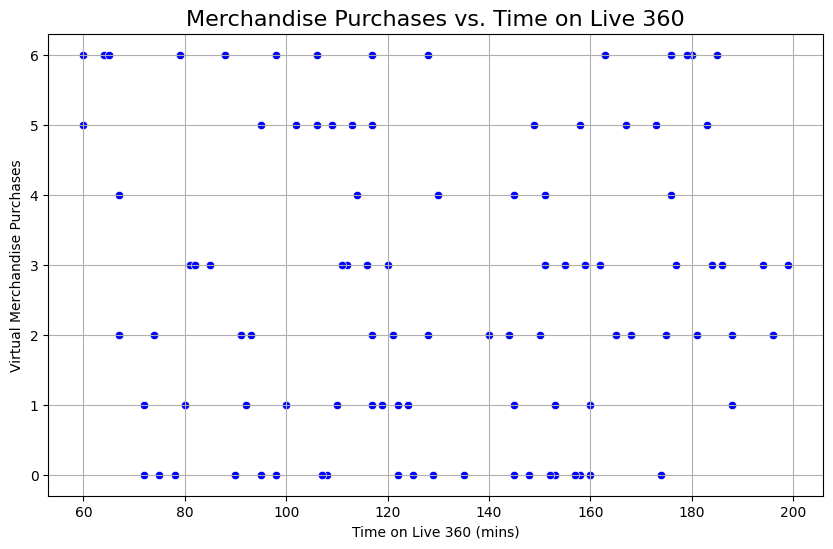

In [ ]:
# Visualization 1: Scatter plot for Merchandise Purchases vs. Time on Live 360

print("Summary statistics of Merchandise Purchases vs. Time on Live 360:")
print(velocityx_df['Virtual Merchandise Purchases'].describe())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=velocityx_df, x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', color='blue')
plt.title('Merchandise Purchases vs. Time on Live 360', fontsize=16)
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Virtual Merchandise Purchases')
plt.grid(True)
plt.show()

This scatterplot shows on average, users make approximately 2.67 purchases, with a standard deviation of 2.06. The majority of users tend to purchase between 1 to 5 items, suggesting potential room for increasing merchandise sales among those who purchase less frequently.

count    100.000000
mean       2.670000
std        2.064882
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        6.000000
Name: Virtual Merchandise Purchases, dtype: float64


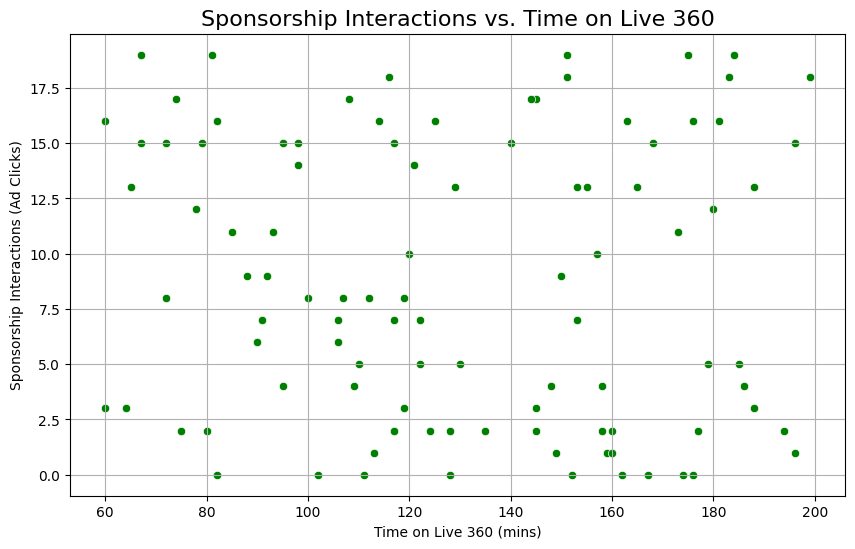

In [ ]:
# Visualization 2: Scatter plot for Sponsorship Interactions vs. Time on Live 360

print(velocityx_df['Virtual Merchandise Purchases'].describe())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=velocityx_df, x='Time on Live 360 (mins)', y='Sponsorship Interactions (Ad Clicks)', color='green')
plt.title('Sponsorship Interactions vs. Time on Live 360', fontsize=16)
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Sponsorship Interactions (Ad Clicks)')
plt.grid(True)
plt.show()


From the scatterplot we see as users increase their time spent in live events, their sponsorship interactions also rise, with users making an average of 2.67 virtual merchandise purchases (with a maximum of 6).

       Virtual Merchandise Purchases  Engagement Score  \
count                     100.000000        100.000000   
mean                        2.670000         43.725000   
std                         2.064882         11.651899   
min                         0.000000         19.700000   
25%                         1.000000         35.050000   
50%                         2.000000         42.650000   
75%                         5.000000         52.300000   
max                         6.000000         67.500000   

       Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  \
count               100.000000                               100.000000   
mean                129.350000                                25.050000   
std                  38.634358                                14.163101   
min                  60.000000                                 0.000000   
25%                  98.000000                                11.000000   
50%                 124.500

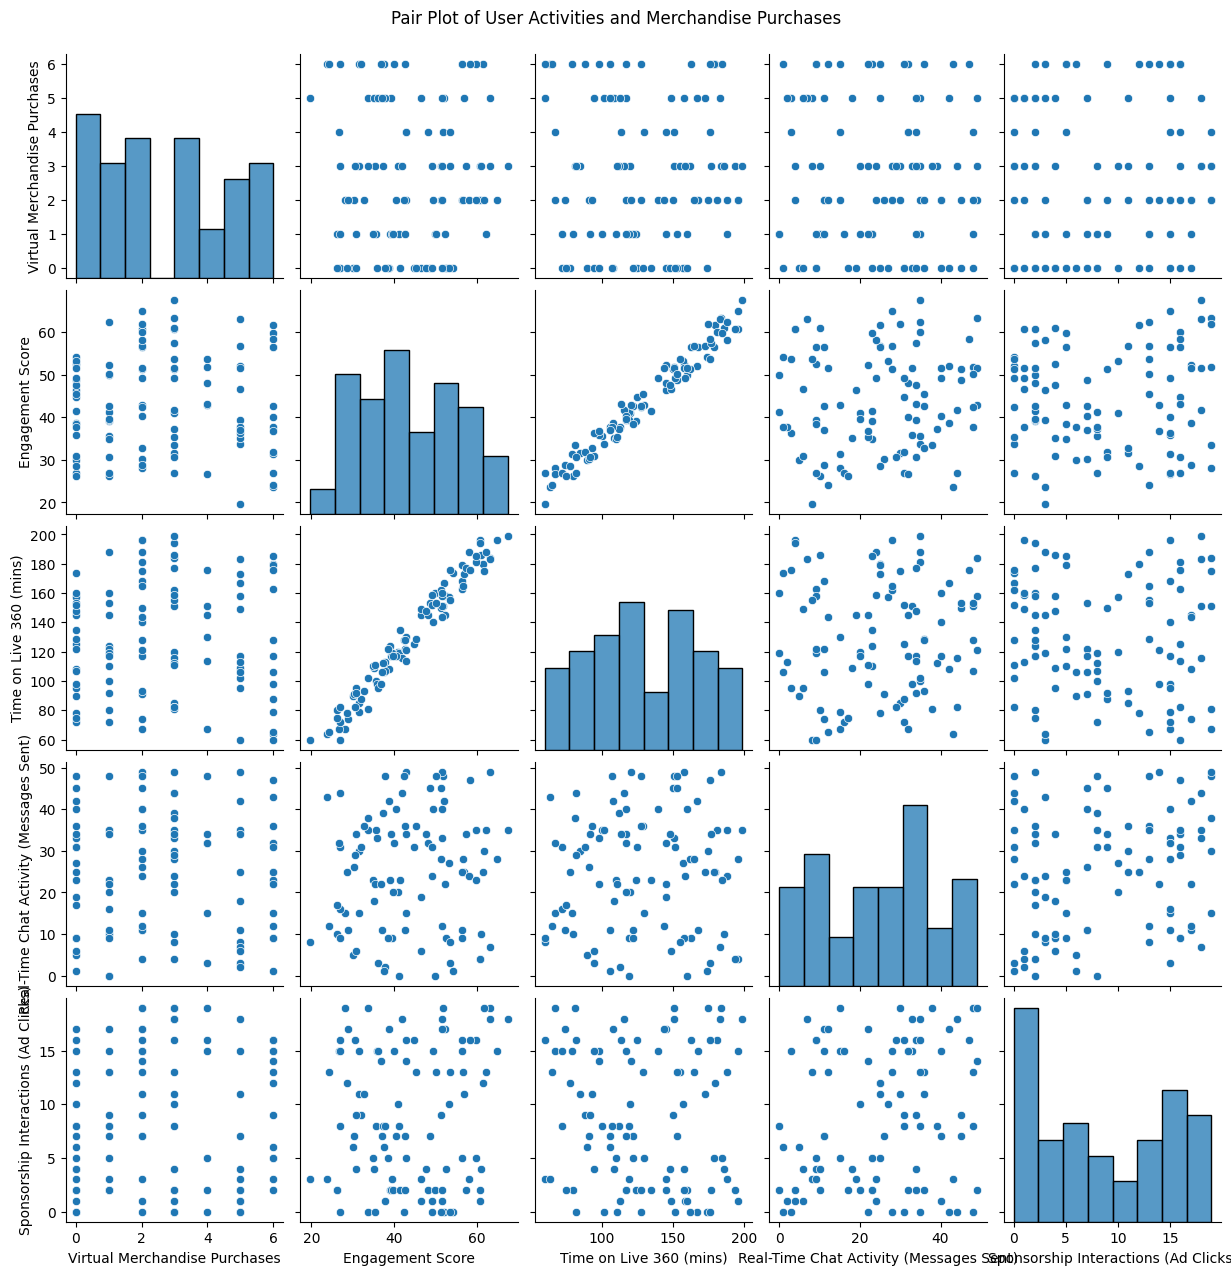

In [ ]:
# Visualization 3: Pair Plot

# Selecting relevant columns for analysis
columns_of_interest = ['Virtual Merchandise Purchases', 'Engagement Score', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Sponsorship Interactions (Ad Clicks)']
sns.pairplot(velocityx_df[columns_of_interest])

# Display summary statistics
summary_statistics = velocityx_df[columns_of_interest].describe()
print(summary_statistics)

# Display the plot
plt.suptitle('Pair Plot of User Activities and Merchandise Purchases', y=1.02)
plt.show()


The pair plot shows relation among user behavior and engagement during race events. On average, users made 2.67 virtual merchandise purchases, with a standard deviation of 2.06, indicating a diverse range of purchasing behaviors. The mean engagement score of 43.73 suggests moderate user engagement, while the time spent in live events averages 129.35 minutes, with participants spending between 60 and 199 minutes.

Real-time chat activity averages 25.05 messages sent, showing that users actively engage with the event. The average sponsorship interactions, with 8.68 ad clicks, also point to significant engagement with sponsorship content, with a maximum of 19 clicks observed.

###### 3. Does happy users tend to spend more?
What makes a happy user? Higher happiness score with many fan challenges completed with high prediction accuracy.
  - Visualization: Scatter Plot
  - Inference: Happier users tend to make more virtual merchandise purchases, and those with higher predictive accuracy are even more inclined to do so.

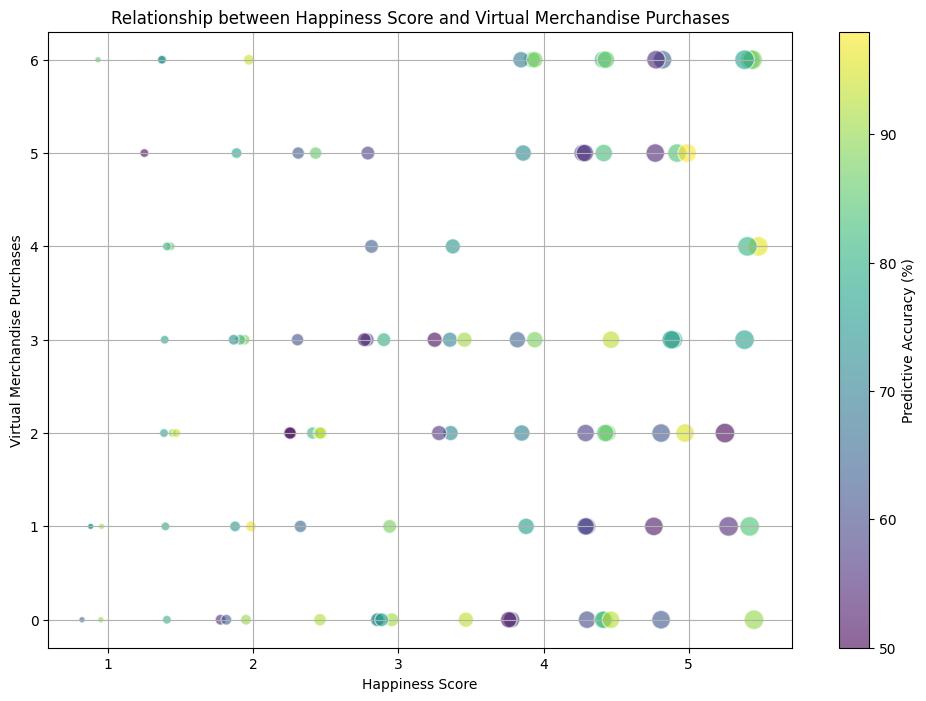

In [ ]:
# Create a scatter plot

# Display descriptive statistics for the relevant columns
description = velocityx_df[['Happiness Score', 'Virtual Merchandise Purchases',
                  'Fan Challenges Completed', 'Predictive Accuracy (%)']].describe()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    velocityx_df['Happiness Score'],
    velocityx_df['Virtual Merchandise Purchases'],
    s=velocityx_df['Fan Challenges Completed'] * 20,  # Scale size of points by fan challenges
    c=velocityx_df['Predictive Accuracy (%)'],  # Color by predictive accuracy
    cmap='viridis',  # Color map
    alpha=0.6,
    edgecolors='w'
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Predictive Accuracy (%)')

# Label the axes and title
plt.title('Relationship between Happiness Score and Virtual Merchandise Purchases')
plt.xlabel('Happiness Score')
plt.ylabel('Virtual Merchandise Purchases')

# Show plot
plt.grid()
plt.show()

We see a positive correlation between Happiness Score and Virtual Merchandise Purchases. As the happiness score increases, the number of virtual merchandise purchases also tends to increase.

The size of the points indicates Predictive Accuracy, suggesting that users with higher predictive accuracy are likely to have a higher number of purchases across various happiness scores. Larger points are clustered around higher happiness scores and merchandise purchases, implying that confident predictions correlate with purchasing behavior.

While most users with high happiness scores also make more purchases, there are some exceptions where users with high happiness scores still have low purchase counts. This could suggest other influencing factors are at play.

###### 4. When are users most prone to click ads?
  - Visualization: OLS regression
  - Inference:
    - Users who are **actively participating in chat** during events are **more likely** to click on ads.
    - There may be a **positive relationship between merchandise purchases** and ad clicks even though the evidence is weak based on p-value.
    - Longer viewing times do not necessarily correlate with higher ad clicks since we found negative insignificant relationship.


In [ ]:
import statsmodels.api as sm

# Define the independent variables (user activity metrics)
X = velocityx_df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases',
           'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

# Define the dependent variable (sponsorship interactions)
y = velocityx_df['Sponsorship Interactions (Ad Clicks)']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Sponsorship Interactions (Ad Clicks)   R-squared:                       0.059
Model:                                              OLS   Adj. R-squared:                  0.009
Method:                                   Least Squares   F-statistic:                     1.178
Date:                                  Tue, 15 Oct 2024   Prob (F-statistic):              0.326
Time:                                          10:49:14   Log-Likelihood:                -323.05
No. Observations:                                   100   AIC:                             658.1
Df Residuals:                                        94   BIC:                             673.7
Df Model:                                             5                                         
Covariance Type:                              nonrobust                                         
                              

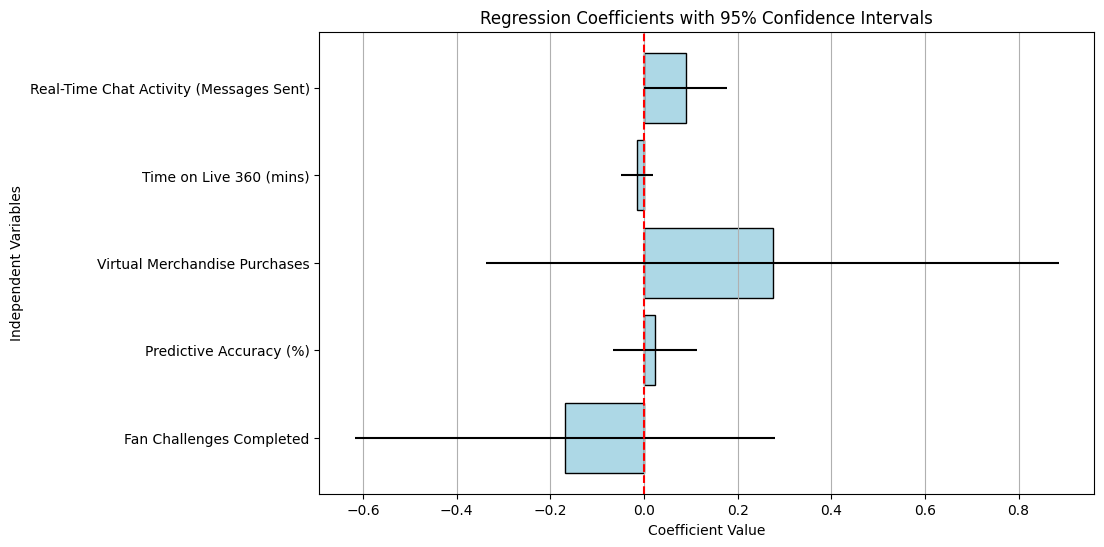

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coefficients from the regression results
coefficients = {
    'Fan Challenges Completed': -0.1688,
    'Predictive Accuracy (%)': 0.0240,
    'Virtual Merchandise Purchases': 0.2751,
    'Time on Live 360 (mins)': -0.0147,
    'Real-Time Chat Activity (Messages Sent)': 0.0892
}

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Coefficient'])

# Standard errors for confidence intervals
std_err = {
    'Fan Challenges Completed': 0.229,
    'Predictive Accuracy (%)': 0.046,
    'Virtual Merchandise Purchases': 0.312,
    'Time on Live 360 (mins)': 0.017,
    'Real-Time Chat Activity (Messages Sent)': 0.045
}

# Calculate confidence intervals (95% CI)
confidence_interval = 1.96 * pd.Series(std_err)
coef_df['Lower CI'] = coef_df['Coefficient'] - confidence_interval
coef_df['Upper CI'] = coef_df['Coefficient'] + confidence_interval

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], xerr=confidence_interval, color='lightblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')  # Vertical line at 0
plt.title('Regression Coefficients with 95% Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Independent Variables')
plt.grid(axis='x')

# Show the plot
plt.show()

- R-squared value (5.9% variability) in ad clicks by all the independent variables in data model suggests weak explanatory power.
- For each additional virtual merchandise purchase, the number of sponsorship interactions is expected to increase by approximately **0.2751**, holding all else constant. But, not enough evidence to reject null hypothesis. Virtual Merchandise Purchases: p = 0.380 (not significant)
- Real-Time Chat Activity (Messages Sent): p = 0.050 (marginally significant) where others have no significant impact (high p-value 0.3+)

####ML Model to Predict Users Likely to Churn

This logistic regression model does a good job at predicting churn, particularly for customers who are likely to leave, though it has room for improvement in distinguishing between churn and non-churn cases.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = velocityx_df

# Step 1: Define churn
# Here, users are considered to have churned if they have low engagement metrics
# Let's assume churn = 1 if purchases or clicks are below a certain threshold
df['Churn'] = ((df['Virtual Merchandise Purchases'] < 2) |
               (df['Sponsorship Interactions (Ad Clicks)'] < 5) |
               (df['Fan Challenges Completed'] < 3)).astype(int)

# Step 2: Prepare features and target variable
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)',
         'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)',
         'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
y = df['Churn']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.77
Confusion Matrix:
[[ 6  4]
 [ 3 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.81      0.85      0.83        20

    accuracy                           0.77        30
   macro avg       0.74      0.72      0.73        30
weighted avg       0.76      0.77      0.76        30



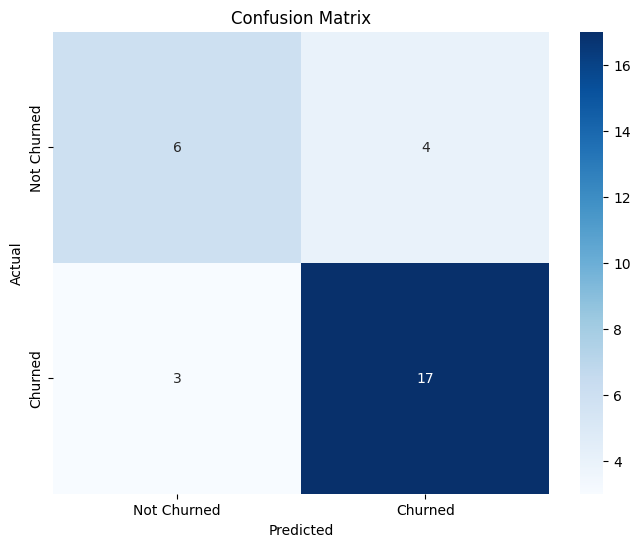

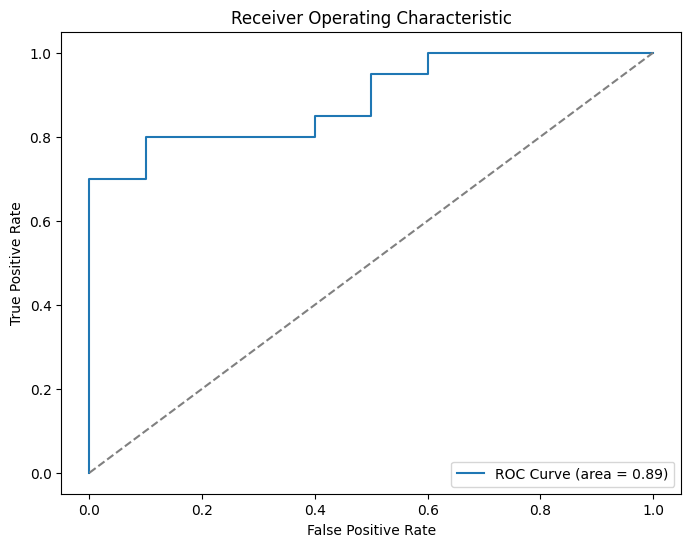

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of churn
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

- The model achieved an accuracy of 77%, meaning it correctly predicted churn status for 77% of the test cases.
- It has more true positives than false negatives, indicating it performs well in predicting customers who churn.
- The model performs better at predicting churners (higher recall and precision for class 1). However, it struggles somewhat with predicting non-churners (class 0), as seen from lower precision (67%) and recall (60%).

The ROC curve shows that the model has a good balance between true positives and false positives.

The AUC score of 0.89 indicates strong classification performance, meaning the model can correctly classify positive and negative instances with high accuracy.

####Decisions to consider for optimizing our goals:

1. Fan Challenge:
  - Target at-risk users with personalized re-engagement campaigns (exclusive rewards or tailored challenges) to prevent churn from predictive model insights.
  - Incentivize low-engagement users through more interactive features, such as live chat prompts and targeted virtual merchandise offers.

2. Merchendise Sales:
  - **Targetted promotion** based on user **engagement score** segmentation:
    - *High Engagement/High Purchases:* Users U006 and U011 are **ideal** for targeted promotions.
    - *Moderate Engagement/Variable Purchases:* User U005 displays unique merchandise interests.
    - *Low Engagement/High Purchases:* User U079 could benefit from targeted marketing strategies due to past satisfaction.
  - **Enhancing user happiness** could be a strategic approach to increasing merchandise sales.

3. Sponsorship Integration:
  - Display sponsor ads or offers during critical race events (like pit stops or race finishes), making the ads feel relevant, while offering exclusive, time-sensitive deals to fans for immediate interaction.
  - Our data shows best place to show ads is the real-time chat interface, so ensure seamless ad integrations there.

###Proposing a new fan challenge: The Podium Finish Bet

1.   Different brands co-sponsor different autonomous cars:
  - Brand specific sponsorship ads displayed in that car's live 360.
2.   Fans pick a car to finish in the top three. As long as they get first, second, or third they win exclusive rewards:
  - Rewards can be used as discounts to purchase virtual merchandise drop specific to that racing event (e.g. custom skins based on animated movie *Cars*).
3. Chance to increase fan engagement by completing increased number of total challenged with higher predictions, every challenge now has 3 chances to be accurate leading to higher happiness scores.

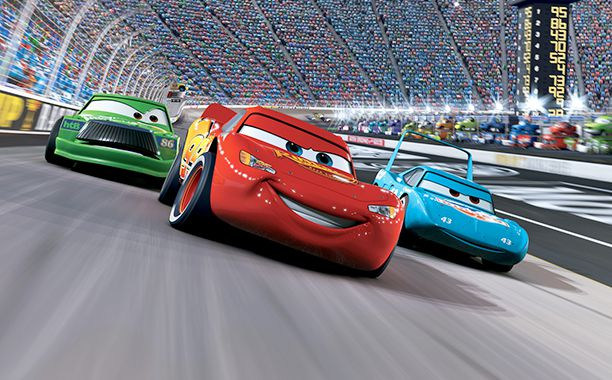



######Engagement - Predictive Outcome:
Based on the logistic regression model, **31% of users are predicted to be highly engaged with the new challenge.** This suggests that the challenge appeals to users who are more active in immersive, live race activities, but might not necessarily attract users primarily interested in making purchases.

That's why we are introducing a lucrative reward system that incentivizes fans to use points in purchasing merchandise with a discount.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# loadthe dataframe
df = velocityx_df

# Step 1: Create the target column - High Engagement
# Users with an engagement score above a threshold (e.g., 45) are considered highly engaged
df['High_Engagement'] = (df['Engagement Score'] > 45).astype(int)

# Step 2: Define features (excluding 'User ID') and target variable (High Engagement)
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)',
        'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)',
        'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

y = df['High_Engagement']

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Step 8: Predict engagement with the new branded challenge for the entire dataset
X_scaled = scaler.transform(X)  # Apply the same scaling to the full dataset
df['Predicted_Engagement'] = model.predict(X_scaled)

# Step 9: Analyze model coefficients to understand key engagement factors
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Step 10: Display predictions and feature importance
print("Predicted engagement with the new challenge for each user:")
print(df[['User ID', 'Predicted_Engagement']])

print("\nKey factors driving engagement:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Saving the predictions to a new CSV file, will do if needed
df.to_csv('predicted_engagement.csv', index=False)

Accuracy: 1.00
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Predicted engagement with the new challenge for each user:
   User ID  Predicted_Engagement
0     U001                     0
1     U002                     0
2     U003                     0
3     U004                     1
4     U005                     0
..     ...                   ...
95    U096                     0
96    U097                     1
97    U098                     0
98    U099                     1
99    U100                     0

[100 rows x 2 columns]

Key factors driving engagement:
                                   Feature  Coefficient
4                  Time on Liv

Time on Live 360 (mins) has the strongest positive impact on engagement, with a high coefficient (3.25). Users who spend more time in live, immersive race experiences are more likely to be highly engaged.

######Engagement - Predictive Outcome (with enhancements):
1. We'll introduce a **risk multiplier** for predicting underdog cars. The more difficult the prediction, the bigger the reward. The higher the multiplier, the more engagement.

2. We can simulate that fans are more likely to engage if they can track their **real-time prediction progress in a dashboard** Live 360 and in Chat as well. We'll assume that fans who get real-time feedback have higher engagement scores.

   User ID  Engagement Score  Final Engagement Score  Engagement Increase (%)
0     U001              41.0                   49.20                     20.0
1     U002              35.6                   53.40                     50.0
2     U003              30.0                   30.00                      0.0
3     U004              49.3                   59.16                     20.0
4     U005              19.7                   29.55                     50.0
..     ...               ...                     ...                      ...
95    U096              36.8                   36.80                      0.0
96    U097              49.2                   59.04                     20.0
97    U098              30.7                   30.70                      0.0
98    U099              51.5                   61.80                     20.0
99    U100              30.6                   30.60                      0.0

[100 rows x 4 columns]


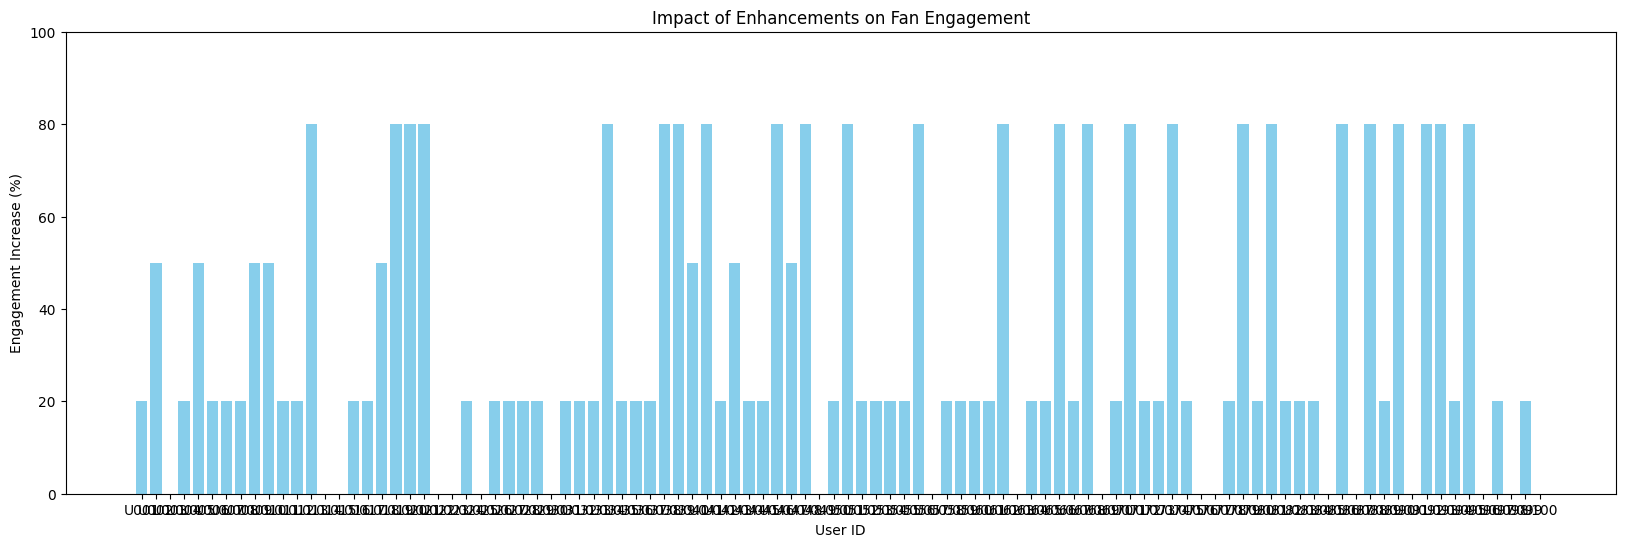

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = velocityx_df

# Step 1: Introduce risk-based multiplier for predicting underdog cars
# Simulate "Risk Multiplier" based on Predictive Accuracy (%)
# Lower accuracy predictions (riskier) get higher multipliers
df['Risk Multiplier'] = np.where(df['Predictive Accuracy (%)'] < 70, 1.5, 1.0)

# Assume that the Engagement Score increases by the multiplier
df['New Engagement Score (Risk Multiplier)'] = df['Engagement Score'] * df['Risk Multiplier']

# Step 2: Introduce engagement boost for real-time visual feedback
# Assume that users with high 'Time on Live 360' minutes receive real-time visual feedback
df['Real-Time Visual Feedback Boost'] = np.where(df['Time on Live 360 (mins)'] > 100, 1.2, 1.0)

# Final Engagement Score after both enhancements
df['Final Engagement Score'] = df['New Engagement Score (Risk Multiplier)'] * df['Real-Time Visual Feedback Boost']

# Calculate engagement increase percentage
df['Engagement Increase (%)'] = ((df['Final Engagement Score'] - df['Engagement Score']) / df['Engagement Score']) * 100

# Show the results
print(df[['User ID', 'Engagement Score', 'Final Engagement Score', 'Engagement Increase (%)']])

# Step 3: Visualize the engagement increase
plt.figure(figsize=(20, 6))
plt.bar(df['User ID'], df['Engagement Increase (%)'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Engagement Increase (%)')
plt.title('Impact of Enhancements on Fan Engagement')
plt.ylim(0, 100)
plt.show()


- The **risk-based reward system** and **real-time feedback** have driven higher engagement scores for the majority of users. The visualization shows that **nearly all users saw an increase, with many seeing a jump of over 50%.**

- Many users have seen significant engagement boosts, with several users showing engagement increases of **80% or more**. Some users have experienced moderate increases in engagement in the range of **20% to 50%.** These users might have participated more due to the dynamic rewards but were not fully affected by real-time feedback, possibly due to lower time spent on live race events.

- A smaller group of users experienced lower engagement increases (e.g., 10%-20%). If we had historic data, we could introduce **targetted and personalized challenges and rewards based on fans' previous engagement** behaviors or preferences (e.g., offering exclusive rewards for users who complete smaller, more achievable goals), fans who are less involved might feel more motivated to participate.

######Monetization - Predictive Outcome:
We assume a linear increase in purchases and ad clicks tied to the engagement improvement.
*   Fans will be motivated to spend more due to discounts and rewards tied to predictions, driving higher sales.
*   Since sponsorship ads are integrated into the real-time experience, we predict an increase in ad clicks as users spend more time engaging with content.



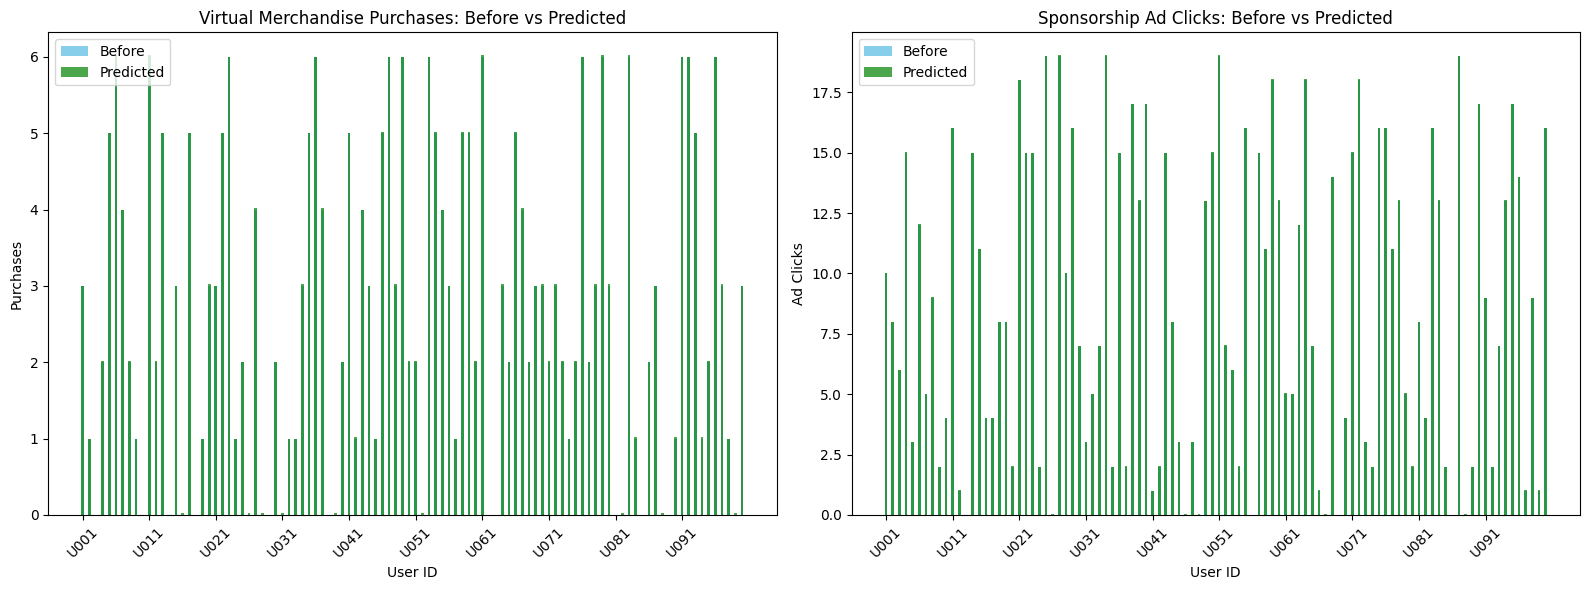

   User ID  Virtual Merchandise Purchases  Predicted_Virtual_Purchases  \
0     U001                              3                         3.00   
1     U002                              1                         1.00   
2     U003                              0                         0.00   
3     U004                              2                         2.02   
4     U005                              5                         5.00   
..     ...                            ...                          ...   
95    U096                              6                         6.00   
96    U097                              3                         3.02   
97    U098                              1                         1.00   
98    U099                              0                         0.02   
99    U100                              3                         3.00   

    Sponsorship Interactions (Ad Clicks)  Predicted_Ad_Clicks  
0                                     10       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = velocityx_df

# Predict increase in virtual purchases based on engagement increase
# Assuming a rule: for every 10% increase in engagement, users buy 0.2 more items
df['Predicted_Virtual_Purchases'] = df['Virtual Merchandise Purchases'] + 0.02 * df['Predicted_Engagement']

# Predict increase in ad clicks based on engagement increase
# Assuming a rule: for every 10% increase in engagement, users click 0.3 more ads
df['Predicted_Ad_Clicks'] = df['Sponsorship Interactions (Ad Clicks)'] + 0.03 * df['Predicted_Engagement']

# Plotting the comparison: Before vs Predicted (After)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Virtual Merchandise Purchases: Before vs Predicted
ax[0].bar(df['User ID'], df['Virtual Merchandise Purchases'], color='skyblue', label='Before', width=0.4)
ax[0].bar(df['User ID'], df['Predicted_Virtual_Purchases'], color='green', label='Predicted', width=0.4, alpha=0.7)
ax[0].set_title('Virtual Merchandise Purchases: Before vs Predicted')
ax[0].set_xlabel('User ID')
ax[0].set_ylabel('Purchases')
ax[0].legend()

# Rotate x-axis labels for better visibility
ax[0].set_xticks(ax[0].get_xticks()[::10])  # Show every 10th tick on the x-axis
ax[0].tick_params(axis='x', rotation=45)

# Sponsorship Interactions (Ad Clicks): Before vs Predicted
ax[1].bar(df['User ID'], df['Sponsorship Interactions (Ad Clicks)'], color='skyblue', label='Before', width=0.4)
ax[1].bar(df['User ID'], df['Predicted_Ad_Clicks'], color='green', label='Predicted', width=0.4, alpha=0.7)
ax[1].set_title('Sponsorship Ad Clicks: Before vs Predicted')
ax[1].set_xlabel('User ID')
ax[1].set_ylabel('Ad Clicks')
ax[1].legend()

# Rotate x-axis labels for better visibility
ax[1].set_xticks(ax[1].get_xticks()[::10])  # Show every 10th tick on the x-axis
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display the data
print(df[['User ID', 'Virtual Merchandise Purchases', 'Predicted_Virtual_Purchases',
          'Sponsorship Interactions (Ad Clicks)', 'Predicted_Ad_Clicks']])


Two assumptions we made:
1. Virtual Merchandise Purchases: For every 10% increase in engagement, users buy 0.2 more virtual items.
2. Sponsorship Ad Clicks: For every 10% increase in engagement, users click 0.3 more ads.

To see monetization impact we simulate a side-by-side comparison of virtual purchases and sponsorship ad clicks before and after applying the predicted engagement enhancements.

The predictions indicate a **positive correlation** between enhanced fan engagement and monetization opportunities. As fans become more engaged, both their virtual merchandise purchases and sponsorship ad clicks are expected to rise, leading to significant revenue growth potential.